In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

- What does each column of $X'$ represent? Ones and heights. 
- what does each row of $X'$ represent? The data that would be involved in the whole computation of a point loss : $w_0 + w_1x_i = {X'}_i^Tw$.
- The first column is full of ones that will be multiplied by the bias $w_0$ in loss computations.
-  $y$ of size $3$ and $X'$ of size $3\times2$. ${X'}_{32}$ would represent the weight of the third person.
- ```helpers.py```

a) Show that the $MSE$ can also be rewritten in terms of the vector e as $\mathcal{L}(w)= \frac{1}{2N}e^Te$

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e = y - tx @ w
    return np.inner(e,e) / (2 * len(y))

In [5]:
w = np.array([1,2])
compute_loss(y,tx,w)

2694.4833658870843

# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))

    for i in np.arange(len(grid_w0)):
        for j in np.arange(len(grid_w1)):
            losses[i, j] = compute_loss(y, tx, [grid_w0[i], grid_w1[j]])
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.006 seconds


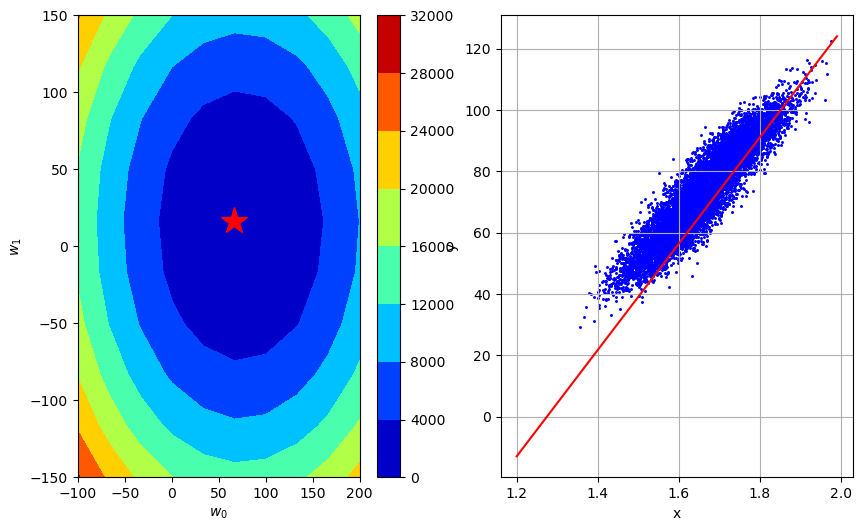

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

b) Does this look like a good estimate? No because the number of interval is so low that there are many missed values not ranged that could be interesting. This is why the MSE plot is not smooth : because ```pyplot``` have the joint the grid points by lines.

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.106 seconds


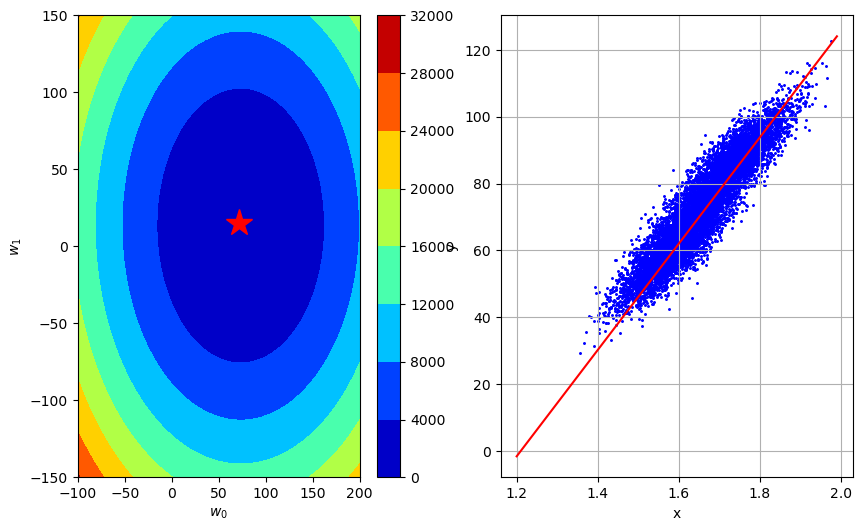

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

Compare the nre fit to the previous one : more smooth, it takes an (exponential) more time but the new lower minimum is not so far from the first one. 

c) 
- coarse grid would not be reliable but finer one should be more expensive
- Try different values of grid spacing. What do you observe?
- How does increasing the number of values affect the computational cost? exponentially?


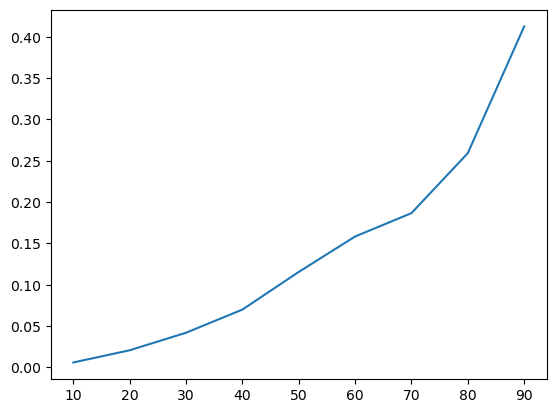

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

interval = np.arange(1,10) * 10
times = []
# Generate the grid of parameters to be swept
for i in interval:
    
    grid_w0, grid_w1 = generate_w(num_intervals=i)
    
    # Start the grid search
    start_time = datetime.datetime.now()
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    
    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()
    times.append(execution_time)

plt.plot(interval, times)
plt.show()

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:   

In [10]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    return - (tx.T @ (y - tx @ w)) / len(y)

In [11]:
y_, tx_ = y[10:40], tx[10:40,:]
grad = compute_gradient(y_, tx_, w)
print(grad * len(y_) + [(y_ - tx_ @ w).sum(),
np.inner((y_ - tx_ @ w), tx_[:,1])])

for w in [[100,20],[50,10]]:
    print("w = {1}, grad={2}".format(0,w, compute_gradient(y,tx,w)))

a= np.array([50,10])
for i in range(4):
    a = a - compute_gradient(y, tx, a)/5
    print(a)

[0. 0.]
w = [100, 20], grad=[26.706078    6.52028757]
w = [50, 10], grad=[-23.293922    -3.47971243]
[54.6587844  10.69594249]
[58.38581192 11.25269648]
[61.36743394 11.69809967]
[63.75273155 12.05442222]


b) Compute the gradients for 
- $w_0=100$ and $w_1=20$
- $w_0=50$ and $w_1=10$

What do the values of these gradients tells us? An intuition of the intermediate values theorem would lead us to consider the extemum we are looking for as kind of 'between' the two points.

The norm of the gradient grows as one gets far from the minimum.

The meaning of this could be that the more we move far from the min the higher our quadratic MSE grows. This could tell us also that it is a good thing that the step size should be(come smaller and) smaller enough while we approach from the fixpoint in our algorithm

Please fill in the functions `gradient_descent` below:

In [12]:
def gradient_descent(y, tx, initial_w, max_iters, gamma, log=True):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        #update gradient
        w =w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        if log : print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [13]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759167, w0=51.305745401473644, w1=9.435798704492269
GD iter. 1/49: loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
GD iter. 2/49: loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
GD iter. 3/49: loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/49: loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.387363601208632, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
GD iter. 10/49: loss=15.3858879656522, w0=73.29379216412117, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305070998, w1=13.479705271317192


interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

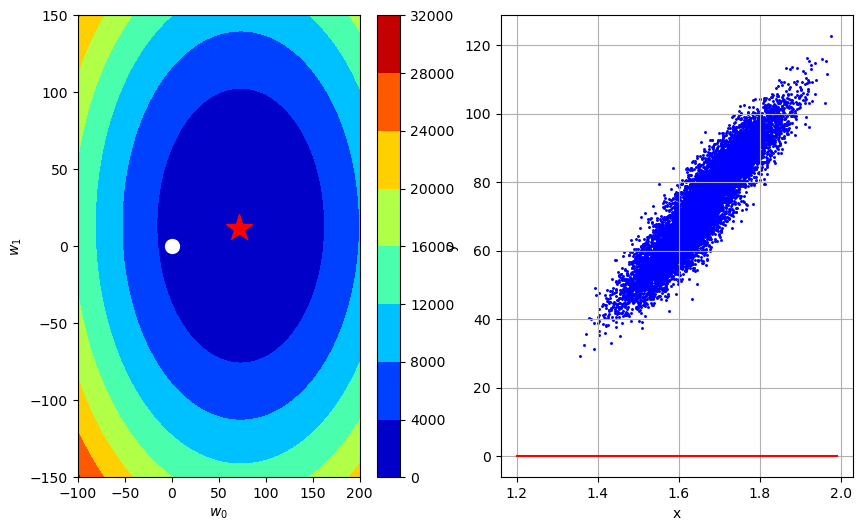

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

Is the cost being minimized? Yes even though it stay pretty constant a few after the start of the algorithm (reaches the minimum soon). This is why the algorithm can be said to be quite fastly converging and the $[w_0, w_1]$ optimal.

In [15]:
# Define the parameters of the algorithm.
max_iters = 50
gammas = [1e-3, 1e-2, .5, 1, 2, 2.5]
execution_times = []

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
for gamma in gammas :
    print("*************************** Gamma : {0} ***************************".format(gamma))
    gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

*************************** Gamma : 0.001 ***************************
GD iter. 0/49: loss=2792.236712759167, w0=0.0732939220021052, w1=0.013479712434988958
GD iter. 1/49: loss=2786.685787960212, w0=0.1465145500822083, w1=0.026945945157543
GD iter. 2/49: loss=2781.1459594599287, w0=0.21966195753423123, w1=0.040398711647374505
GD iter. 3/49: loss=2775.617205076818, w0=0.2927362175788021, w1=0.05383802537071618
GD iter. 4/49: loss=2770.099502673719, w0=0.36573740336332844, w1=0.06726389978033444
GD iter. 5/49: loss=2764.592830157724, w0=0.4386655879620703, w1=0.08067634831554304
GD iter. 6/49: loss=2759.0971654800883, w0=0.5115208443762134, w1=0.0940753844022165
GD iter. 7/49: loss=2753.612486636144, w0=0.5843032455339423, w1=0.10746102145280326
GD iter. 8/49: loss=2748.138771665208, w0=0.6570128642905136, w1=0.12083327286633935
GD iter. 9/49: loss=2742.6759986504985, w0=0.7296497734283284, w1=0.1341921520284621
GD iter. 10/49: loss=2737.2241457190466, w0=0.8022140456570053, w1=0.14753767

Try the values of step sized $[0.001,0.01, 1, 2, 2.5]$, what do you observe? The algorithm converge pretty similarily for a stpe of $0.5$ (a little slower), quite immediatly for a $\gamma$ of $1$, really slowly for $\gamma$s of $0.001$ and $0.01$ without reaching the fixpoint in the desired iteration number.  
For values of $2$ it kind a loop and totally diverge with $\gamma=2.5$.  

Try different initializations with fixed step size $\gamma=0.1$.

In [16]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = .1
execution_times = []

# Initialization
ws = np.array([[0,0], [100,10], [-1000, 1000]])

# Start gradient descent.
for w_initial in ws:
    print("*************************** w : {0} ***************************".format(w_initial))
    gradient_descent(y, tx, w_initial, max_iters, gamma)

*************************** w : [0 0] ***************************
GD iter. 0/49: loss=2792.236712759167, w0=7.3293922002105205, w1=1.347971243498896
GD iter. 1/49: loss=2264.6350560300025, w0=13.925845180399996, w1=2.5611453626479035
GD iter. 2/49: loss=1837.2777140793794, w0=19.862652862570513, w1=3.6530020698820147
GD iter. 3/49: loss=1491.1182670993749, w0=25.205779776523983, w1=4.63567310639271
GD iter. 4/49: loss=1210.7291150455712, w0=30.0145939990821, w1=5.520077039252342
GD iter. 5/49: loss=983.6139018819906, w0=34.3425267993844, w1=6.316040578826005
GD iter. 6/49: loss=799.6505792194904, w0=38.23766631965648, w1=7.032407764442302
GD iter. 7/49: loss=650.6402878628647, w0=41.74329188790136, w1=7.677138231496974
GD iter. 8/49: loss=529.9419518639979, w0=44.89835489932174, w1=8.257395651846178
GD iter. 9/49: loss=432.176299704916, w0=47.737911609600076, w1=8.779627330160464
GD iter. 10/49: loss=352.9861214560597, w0=50.29351264885059, w1=9.24963584064332
GD iter. 11/49: loss=288.

The algorithm seems to monotonicathe lly converge but with more or less step depending on the initial $w$. Like if it was depending on how far the stating point was.  

We can conclude that both the step size and the initial $w$ are an important combination choice of design like $w=[0,0]$ wich was quite fast converging with good $\gamma$'s that pretty less converge with a value of $0.1$ 

# 4. Stochastic gradient descent

In [17]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma, log=True):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    batchs = batch_iter(y, tx, batch_size, num_batches=max_iters)

    for n_iter in range(max_iters):
        minibatch_y, minibatch_tx = next(batchs)
        grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        w = w - gamma * grad
        
        loss = compute_loss(minibatch_y, minibatch_tx, w)

        ws.append(w)
        losses.append(loss)

        if log : print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [18]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=970.1446103075529, w0=8.842959986618547, w1=17.727392786262385
SGD iter. 1/49: loss=1125.2975163380684, w0=15.089847727438757, w1=25.133969301990817
SGD iter. 2/49: loss=1390.6470124864072, w0=21.250994760645327, w1=21.04603881939038
SGD iter. 3/49: loss=911.4461154266216, w0=26.241282429935833, w1=24.372403252824014
SGD iter. 4/49: loss=894.7819709263393, w0=31.09456029173311, w1=21.787952486523707
SGD iter. 5/49: loss=699.1230635765521, w0=36.02828677852983, w1=15.906843711891419
SGD iter. 6/49: loss=57.99349492238435, w0=39.16082301901672, w1=23.29456960619278
SGD iter. 7/49: loss=564.0939404915347, w0=43.1191467143811, w1=20.45542351619114
SGD iter. 8/49: loss=472.49742297389594, w0=46.81013662864054, w1=17.431057044376452
SGD iter. 9/49: loss=37.96237845170577, w0=48.55572908457977, w1=20.925860318375484
SGD iter. 10/49: loss=33.314311489692855, w0=49.68313917644313, w1=22.421468447353828
SGD iter. 11/49: loss=293.4286377452433, w0=52.52467006039959, w1=20.463

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

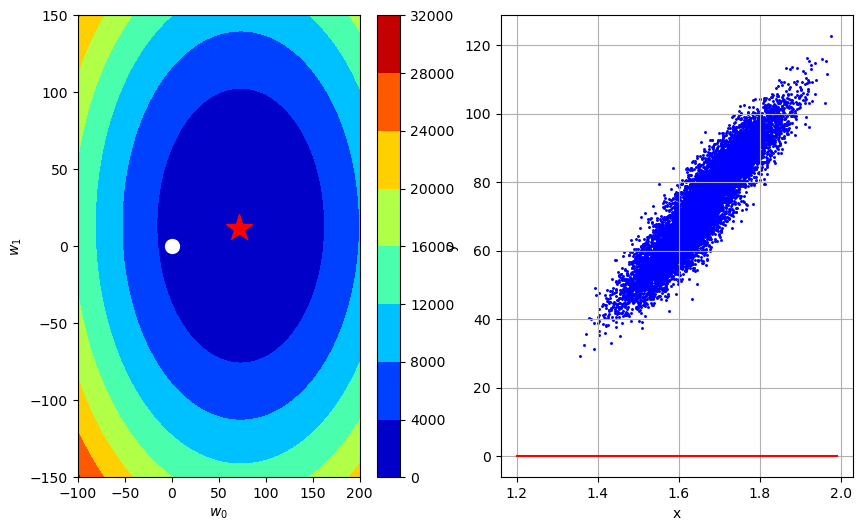

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

A preliminary remark is that the losses at each iteration are local and not so reliant on the gradient descent algorithm as previously. The convergence is quite slow and does not seems to have met the fixpoint in the defined max number of iteration. It seems still converging though.

# 5. Effect of Outliers and MAE Cost Function

In [20]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [21]:
y.shape, tx.shape

((200,), (200, 2))

[]

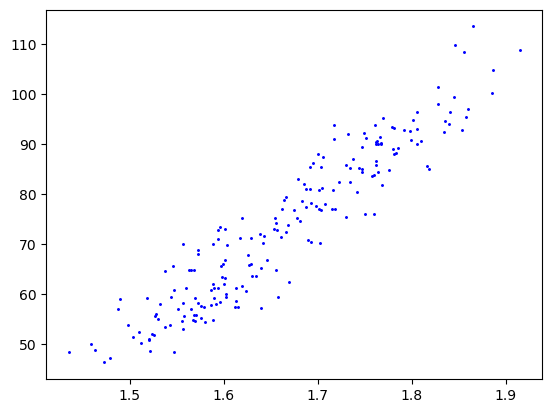

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(height, weight, marker=".", color="b", s=5)
plt.plot()

GD iter. 0/49: loss=2829.272224438416, w0=51.54259072181176, w1=10.132993413506084
GD iter. 1/49: loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
GD iter. 2/49: loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
GD iter. 3/49: loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=13.644931152102245, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=13.643446931881352, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=13.64343490969756, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=13.643434820358397, w0=73.6322333285226, w1=14.47569718345401

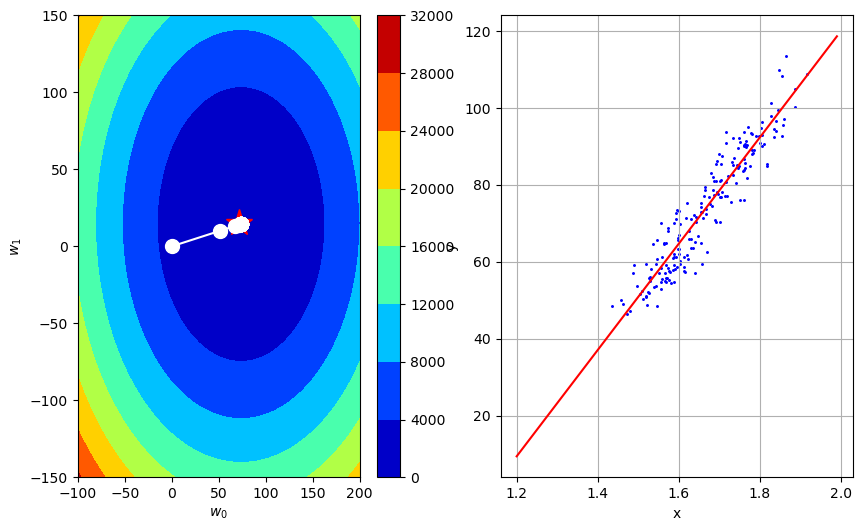

In [23]:
from grid_search import generate_w, get_best_parameters
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
w_initial = np.array([0, 0])

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

losses, ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

# Plot the results
fig =  gradient_descent_visualization(
    losses, ws,
    grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
#fig.savefig("grid_plot")  # Optional saving

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036947, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140231, w0=74.06776649225755, w1=11.034889001593541
GD it

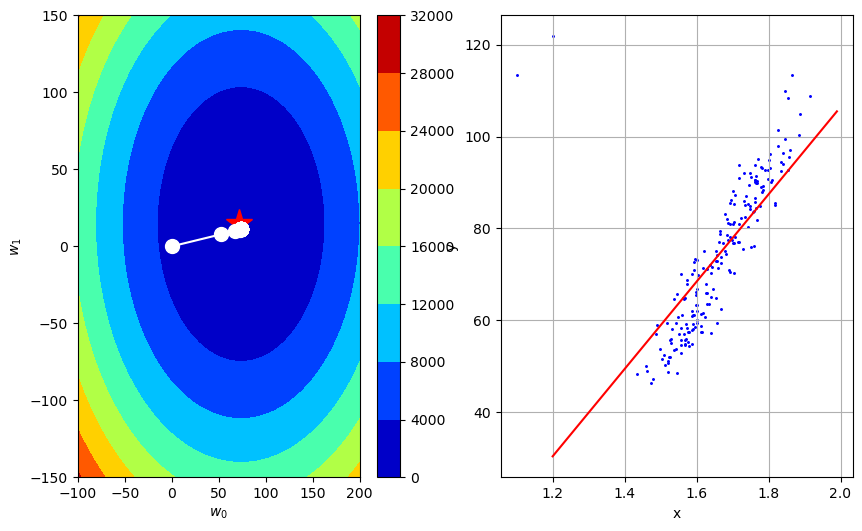

In [24]:
from plots import gradient_descent_visualization
from helpers import *
from grid_search import generate_w
from plots import gradient_descent_visualization

height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
w_initial = np.array([0, 0])

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)
losses, ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

# Plot the results
fig =  gradient_descent_visualization(
    losses, ws,
    grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
#fig.savefig("grid_plot")  # Optional saving

GD iter. 0/49: loss=2793.063324919039, w0=51.311949971831694, w1=9.375829281932628
GD iter. 1/49: loss=266.5853963287441, w0=66.70553496338118, w1=12.1885780665124
GD iter. 2/49: loss=39.202382755617954, w0=71.32361046084603, w1=13.03240270188633
GD iter. 3/49: loss=18.73791153403659, w0=72.70903311008549, w1=13.28555009249851
GD iter. 4/49: loss=16.89610912409425, w0=73.12465990485732, w1=13.361494309682165
GD iter. 5/49: loss=16.73034690719944, w0=73.24934794328888, w1=13.384277574837261
GD iter. 6/49: loss=16.715428307678906, w0=73.28675435481834, w1=13.39111255438379
GD iter. 7/49: loss=16.714085633722057, w0=73.29797627827718, w1=13.393163048247748
GD iter. 8/49: loss=16.713964793065944, w0=73.30134285531483, w1=13.393778196406936
GD iter. 9/49: loss=16.71395391740689, w0=73.30235282842612, w1=13.393962740854693
GD iter. 10/49: loss=16.71395293859758, w0=73.30265582035952, w1=13.39401810418902
GD iter. 11/49: loss=16.71395285050474, w0=73.30274671793954, w1=13.394034713189317
GD i

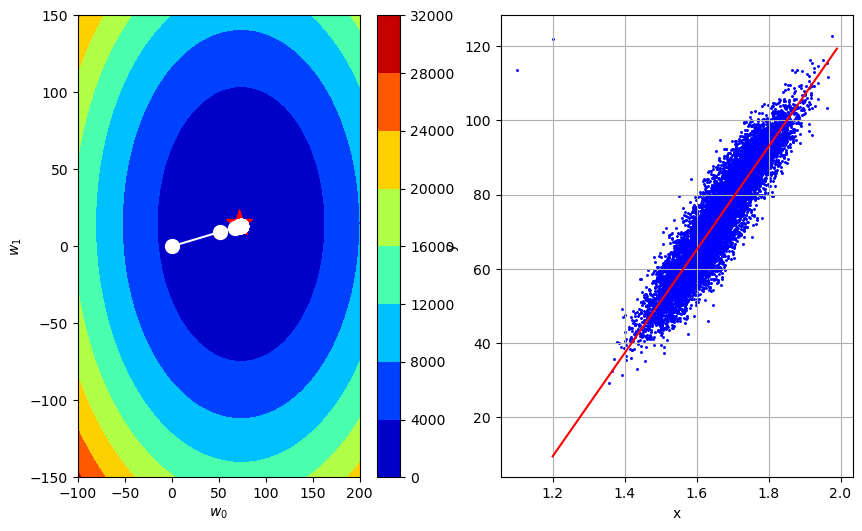

In [25]:
from plots import gradient_descent_visualization
from helpers import *
from grid_search import generate_w
from plots import gradient_descent_visualization

height, weight, gender = load_data(sub_sample=False, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)
losses, ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

# Plot the results
fig =  gradient_descent_visualization(
    losses, ws,
    grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
#fig.savefig("grid_plot")  # Optional saving

Fit the model again to the augmented dataset with the outliers. Does it look like a good fit? Yes it converges to a fixpoint that is near the previous one with a loss as low as the previous one. We can say that outliers effects may depends on their proportion and magnitude.

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

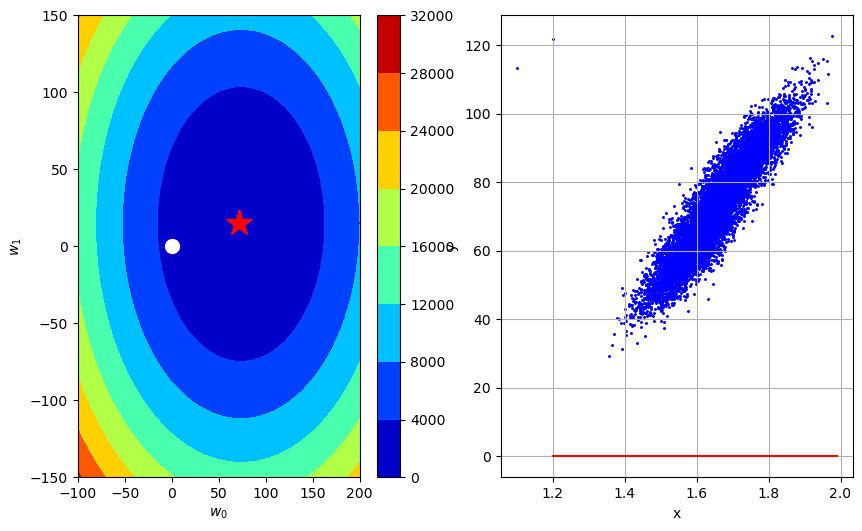

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

In [32]:
def compute_loss(y, tx, w, mse=True):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e = y - tx @ w
    return (np.inner(e,e) if mse else np.absolute(e).sum()) / ((1 + mse) * len(y))
    
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    e = y - tx @ w
    return - (tx.T @ np.sign(e)) / len(y)
    

In [36]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        g = compute_subgradient_mae(y, tx, w)
        w = w - gamma * g

        loss = compute_loss(y, tx, w, mse=False)
        
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [37]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=72.60278567404525, w0=0.7, w1=-6.36518987443561e-17
SubGD iter. 1/499: loss=71.90278567404525, w0=1.4, w1=-1.273037974887122e-16
SubGD iter. 2/499: loss=71.20278567404526, w0=2.0999999999999996, w1=-1.9095569623306827e-16
SubGD iter. 3/499: loss=70.50278567404526, w0=2.8, w1=-2.546075949774244e-16
SubGD iter. 4/499: loss=69.80278567404525, w0=3.5, w1=-3.182594937217805e-16
SubGD iter. 5/499: loss=69.10278567404525, w0=4.2, w1=-3.819113924661366e-16
SubGD iter. 6/499: loss=68.40278567404525, w0=4.9, w1=-4.455632912104926e-16
SubGD iter. 7/499: loss=67.70278567404526, w0=5.6000000000000005, w1=-5.092151899548488e-16
SubGD iter. 8/499: loss=67.00278567404526, w0=6.300000000000001, w1=-5.728670886992049e-16
SubGD iter. 9/499: loss=66.30278567404525, w0=7.000000000000001, w1=-6.36518987443561e-16
SubGD iter. 10/499: loss=65.60278567404525, w0=7.700000000000001, w1=-7.001708861879171e-16
SubGD iter. 11/499: loss=64.90278567404525, w0=8.4, w1=-7.638227849322732e-16
Sub

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

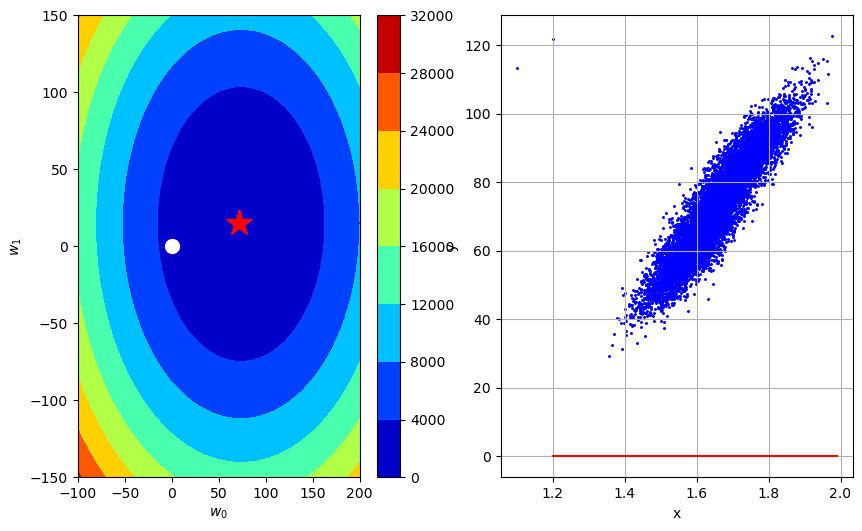

In [38]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [39]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    batch_iterator = batch_iter(y, tx, batch_size=batch_size, num_batches=max_iters)

    for n_iter in range(max_iters):
        minibatch_y, minibatch_tx = next(batch_iterator)

        g = compute_subgradient_mae(y, tx, w)
        w = w - gamma * g
        
        loss = compute_loss(y, tx, w, mse=False)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [40]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=72.60278567404525, w0=0.7, w1=-6.36518987443561e-17
SubSGD iter. 1/499: loss=71.90278567404525, w0=1.4, w1=-1.273037974887122e-16
SubSGD iter. 2/499: loss=71.20278567404526, w0=2.0999999999999996, w1=-1.9095569623306827e-16
SubSGD iter. 3/499: loss=70.50278567404526, w0=2.8, w1=-2.546075949774244e-16
SubSGD iter. 4/499: loss=69.80278567404525, w0=3.5, w1=-3.182594937217805e-16
SubSGD iter. 5/499: loss=69.10278567404525, w0=4.2, w1=-3.819113924661366e-16
SubSGD iter. 6/499: loss=68.40278567404525, w0=4.9, w1=-4.455632912104926e-16
SubSGD iter. 7/499: loss=67.70278567404526, w0=5.6000000000000005, w1=-5.092151899548488e-16
SubSGD iter. 8/499: loss=67.00278567404526, w0=6.300000000000001, w1=-5.728670886992049e-16
SubSGD iter. 9/499: loss=66.30278567404525, w0=7.000000000000001, w1=-6.36518987443561e-16
SubSGD iter. 10/499: loss=65.60278567404525, w0=7.700000000000001, w1=-7.001708861879171e-16
SubSGD iter. 11/499: loss=64.90278567404525, w0=8.4, w1=-7.63822784932

interactive(children=(IntSlider(value=1, description='n_iter', max=1, min=1), Output()), _dom_classes=('widget…

<function __main__.plot_figure(n_iter)>

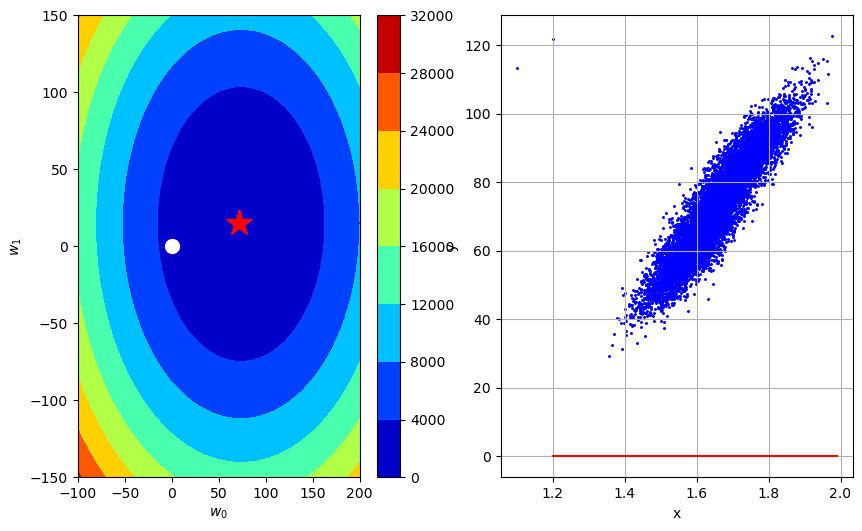

In [42]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))